In [1]:
%matplotlib inline

import numpy as np
import io
import sklearn
import sklearn.datasets 
import pandas as pd
import requests
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from train import train

fig_size = [12, 9]
plt.rcParams["figure.figsize"] = fig_size

np.random.seed(42)

# Neural Network

![equation](https://i.stack.imgur.com/VqOpE.jpg)


# Activiation Function: Sigmoid
![Sigmoid](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

In [2]:
def sigmoid(z):
    return 1.0 / (1.0+np.exp(-z))

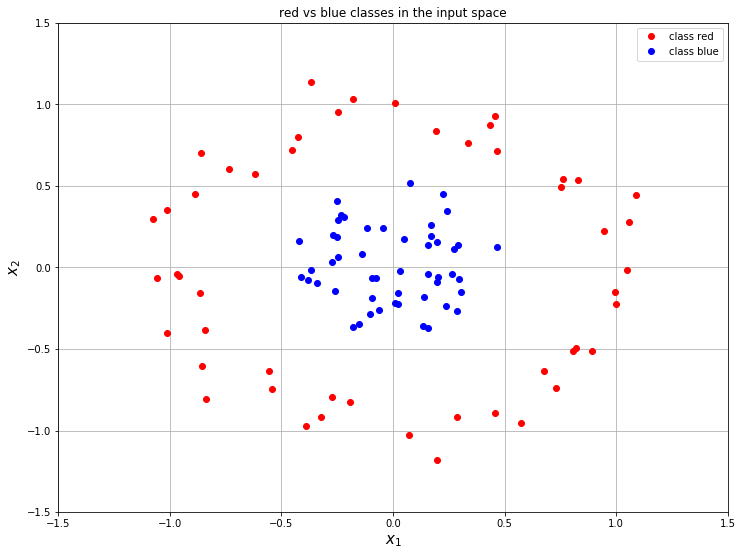

In [3]:
num_samples = 100

# Generate input data
X, t = sklearn.datasets.make_circles(n_samples=num_samples, shuffle=False, factor=0.3, noise=0.1)
T = np.zeros((100,2)) # Define target matrix
T[t==1,1] = 1
T[t==0,0] = 1

# Separate the red and blue points for plotting
x_red = X[t==0]
x_blue = X[t==1]

# Plot both classes on the x1, x2 plane
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='class red')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='class blue')
plt.grid()
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classes in the input space')
plt.show()

In [5]:
input_size = 2
hidden_size = 3
output_size = 2

Wh = np.random.randn(input_size, hidden_size) * 1.25 # input to hidden
Wo = np.random.randn(hidden_size, output_size) * 1.25 # hidden to output
bh = np.zeros((hidden_size,)) # hidden bias
bo = np.zeros((output_size,)) # hidden bias

# Outputs
def feedforward(x, w, b):
    return sigmoid(np.dot(x, w) + b)

Epoch:  0 Accuracy:  0.5 0.702135
Epoch:  10 Accuracy:  0.47 0.692989
Epoch:  20 Accuracy:  0.53 0.69265
Epoch:  30 Accuracy:  0.54 0.692394
Epoch:  40 Accuracy:  0.54 0.692149
Epoch:  50 Accuracy:  0.55 0.691906
Epoch:  60 Accuracy:  0.55 0.691659
Epoch:  70 Accuracy:  0.56 0.691403
Epoch:  80 Accuracy:  0.57 0.691132
Epoch:  90 Accuracy:  0.57 0.690841
Epoch:  100 Accuracy:  0.59 0.690525
Epoch:  110 Accuracy:  0.59 0.690179
Epoch:  120 Accuracy:  0.59 0.689797
Epoch:  130 Accuracy:  0.6 0.689375
Epoch:  140 Accuracy:  0.6 0.688906
Epoch:  150 Accuracy:  0.6 0.688385
Epoch:  160 Accuracy:  0.6 0.687804
Epoch:  170 Accuracy:  0.61 0.687157
Epoch:  180 Accuracy:  0.62 0.686436
Epoch:  190 Accuracy:  0.62 0.685633
Epoch:  200 Accuracy:  0.64 0.684739
Epoch:  210 Accuracy:  0.64 0.683744
Epoch:  220 Accuracy:  0.64 0.682639
Epoch:  230 Accuracy:  0.65 0.681412
Epoch:  240 Accuracy:  0.66 0.680051
Epoch:  250 Accuracy:  0.66 0.678543
Epoch:  260 Accuracy:  0.67 0.676873
Epoch:  270 Accura

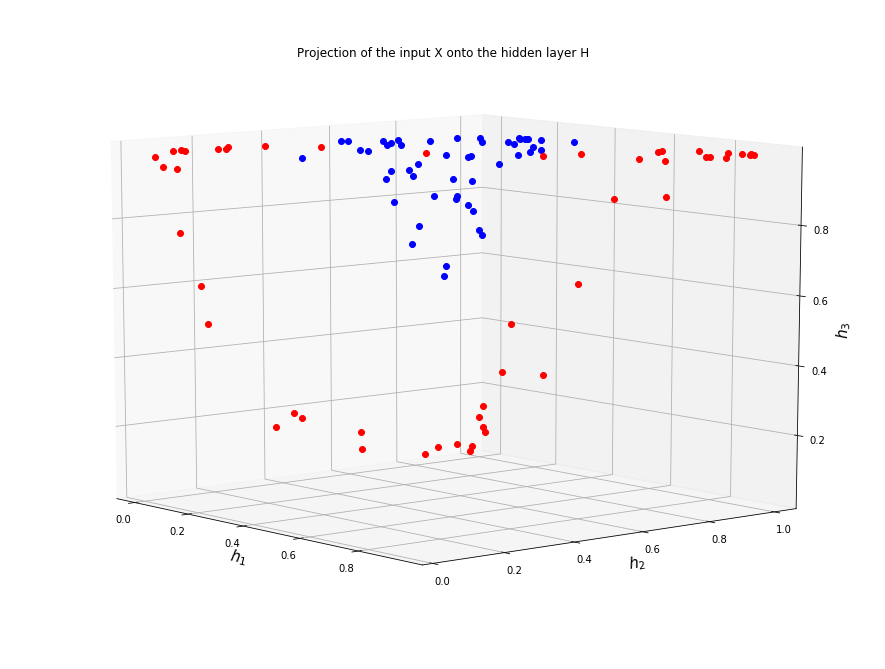

In [8]:
[Wh, Wo, bh, bo] = train(X, T)

# Plot the projection of the input onto the hidden layer

# Define the projections of the blue and red classes
H_blue = feedforward(x_blue, Wh, bh)
H_red = feedforward(x_red, Wh, bh)

# Plot the error surface
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(np.ravel(H_blue[:,0]), np.ravel(H_blue[:,1]), np.ravel(H_blue[:,2]), 'bo')
ax.plot(np.ravel(H_red[:,0]), np.ravel(H_red[:,1]), np.ravel(H_red[:,2]), 'ro')
ax.set_xlabel('$h_1$', fontsize=15)
ax.set_ylabel('$h_2$', fontsize=15)
ax.set_zlabel('$h_3$', fontsize=15)
ax.view_init(elev=10, azim=-40)
plt.title('Projection of the input X onto the hidden layer H')
plt.grid()
plt.show()

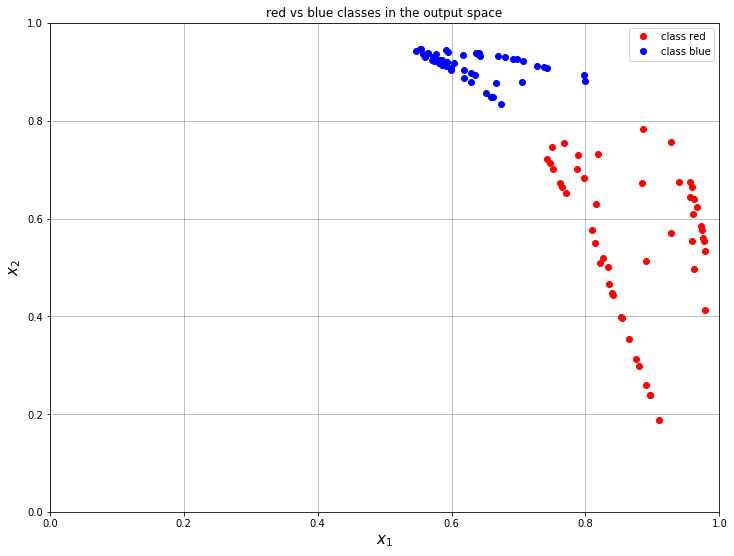

In [9]:
# Plot the projection of the hidden onto the output layer

y_blue = feedforward(H_blue, Wo, bo)
y_red = feedforward(H_red, Wo, bo)

plt.plot(y_red[:,0], y_red[:,1], 'ro', label='class red')
plt.plot(y_blue[:,0], y_blue[:,1], 'bo', label='class blue')
plt.grid()
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([0.0, 1., 0.0, 1.])
plt.title('red vs blue classes in the output space')
plt.show()

# Recurrent Neural Network
![equation](http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/rnn.jpg)

In [20]:
num_step = 12
input_size = 1
hidden_size = 2
output_size = 1

U = np.random.uniform(-1., 1., size=(input_size, hidden_size)) # input to hidden
W = np.random.uniform(-1., 1., size=(hidden_size, hidden_size)) # hidden to hidden
V = np.random.uniform(-1., 1., size=(hidden_size, output_size)) # hidden to output
bh = np.zeros((hidden_size,)) # hidden bias
bo = np.zeros((output_size,)) # output bias

In [10]:
def unfold(x, h):
    h = np.tanh(np.dot(x, U) + np.dot(h, W) + bh) # input to hidden
    y = np.dot(h, V) + bo # hidden to output
    return y, h

In [11]:
# HSBC stock prices
url="http://real-chart.finance.yahoo.com/table.csv?s=0005.HK&d=2&e=19&f=2017&g=d&a=0&b=3&c=2000&ignore=.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
last100 = c.head(100)

last100

,Date,Open,High,Low,Close,Volume,Adj Close
0,2017-03-17,64.20,64.40,63.85,64.15,18187400,64.150
1,2017-03-16,64.05,64.45,63.85,64.35,24530100,64.350
2,2017-03-15,63.30,64.00,63.15,63.70,17310900,63.700
3,2017-03-14,64.05,64.10,63.50,63.50,21430300,63.500
4,2017-03-13,63.60,64.60,63.35,64.35,38625300,64.350
5,2017-03-10,62.80,63.05,62.55,63.00,11725800,63.000
6,2017-03-09,63.00,63.10,62.70,62.85,16874500,62.850
7,2017-03-08,63.00,63.35,63.00,63.15,11001600,63.150
8,2017-03-07,63.20,63.50,63.20,63.20,8828100,63.200
9,2017-03-06,63.50,63.75,63.15,63.20,13603200,63.200


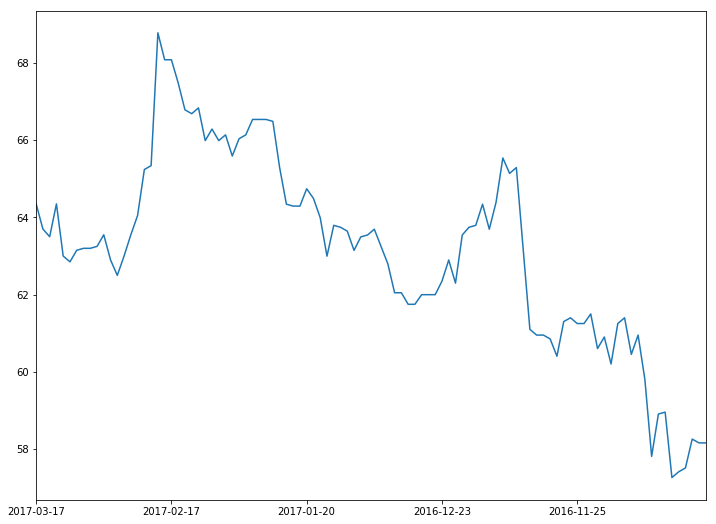

In [23]:
# Dates
date = [p[0] for p in c.head(100).values.tolist()]

# Close prices
prices = np.array([p[-1] for p in c.head(101).values.tolist()], dtype=np.float32)

ts = pd.Series(prices[1:], index=date)
ts.plot()
plt.show()

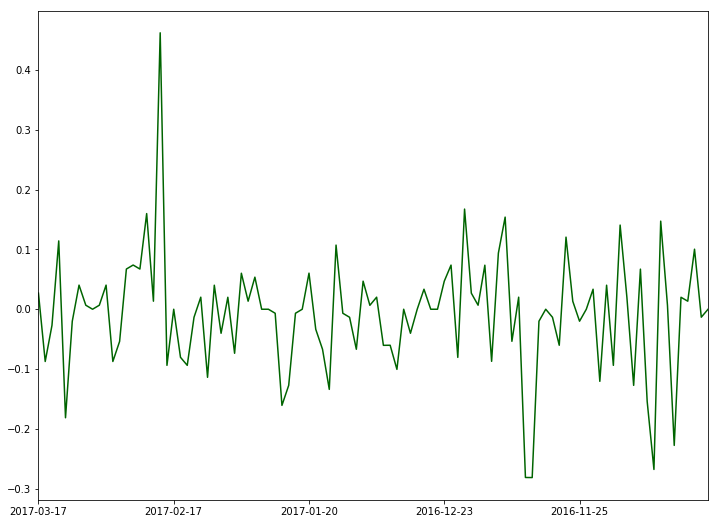

In [24]:
# Nomarlize
norm1 = prices[1:] - prices[:-1] # today price - yesterday price
norm2 = norm1 / np.linalg.norm(norm1)

ts = pd.Series(norm2, index=date)
ts.plot(color='DarkGreen')

plt.show()

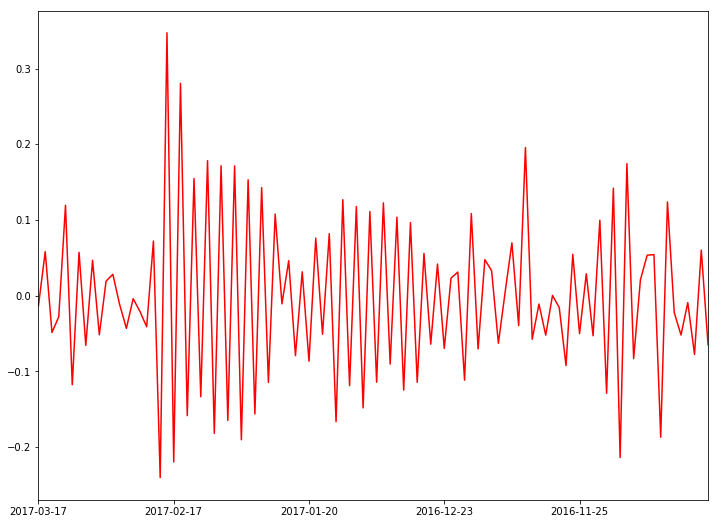

In [25]:
outputs = []
current_state = np.zeros((hidden_size,))

for i in range(100):
    o, h = unfold(np.asarray([norm2[i]]), current_state)
    current_state = h
    outputs.append(o[0])

ts = pd.Series(outputs, index=date)
ts.plot(color='Red')

plt.show()